# Create plots used in report

In [2]:
import humanfriendly
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
resources_df = pd.read_csv("data/docker-resources.csv")

# Strip % sign
for col in ["CPUPerc", "MemPerc"]:
    resources_df[col] = resources_df[col].apply(lambda x: float(x.strip("%")))

# Convert human readable format to bytes
for col in ["MemUsage", "MemTotal", "NetInput", "NetOutput", "BlockInput", "BlockOutput"]:
    resources_df[col] = resources_df[col].apply(humanfriendly.parse_size)

# Convert Time column from seconds since epoch to datetime
resources_df["Time"] = resources_df["Time"].apply(datetime.datetime.fromtimestamp)

resource_percentage_df = resources_df.melt(id_vars=["Name", "Time"], value_vars=["CPUPerc", "MemPerc"], var_name="Type", value_name="Percentage")

resources_bytes_df = resources_df.melt(id_vars=["Name", "Time"], value_vars=["NetInput", "NetOutput", "BlockInput", "BlockOutput"], var_name="Type", value_name="Bytes")

resources_df

,Time,Name,ID,CPUPerc,MemUsage,MemTotal,MemPerc,NetInput,NetOutput,BlockInput,BlockOutput,PIDs
0,2021-09-19 20:31:15,mongo,27794d582dbc,0.40,193881702,2147483648,9.03,614000000,862000000,750000,221000000,35
1,2021-09-19 20:31:15,acmeair,c1688cddc438,1.25,8876195,2147483648,0.41,1560000000,1770000000,4100,4100,22
2,2021-09-19 20:31:20,mongo,27794d582dbc,0.97,193881702,2147483648,9.03,614000000,862000000,750000,221000000,35
3,2021-09-19 20:31:20,acmeair,c1688cddc438,1.30,8876195,2147483648,0.41,1560000000,1770000000,4100,4100,22
4,2021-09-19 20:31:25,mongo,27794d582dbc,23.18,194301132,2147483648,9.05,615000000,863000000,750000,222000000,35
...,...,...,...,...,...,...,...,...,...,...,...,...
151,2021-09-19 20:37:30,acmeair,c1688cddc438,1.56,8933867,2147483648,0.42,2440000000,2770000000,4100,4100,23
152,2021-09-19 20:37:35,mongo,27794d582dbc,0.39,257110835,2147483648,11.97,956000000,1350000000,750000,330000000,35
153,2021-09-19 20:37:35,acmeair,c1688cddc438,1.21,8933867,2147483648,0.42,2440000000,2770000000,4100,4100,23
154,2021-09-19 20:37:40,mongo,27794d582dbc,1.01,257215692,2147483648,11.98,956000000,1350000000,750000,330000000,35


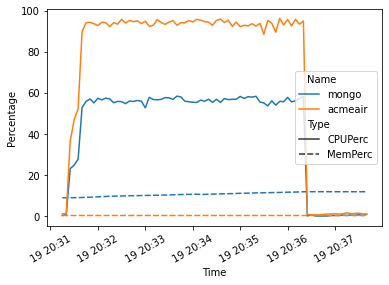

In [4]:
plt.xticks(rotation=30)
p = sns.lineplot(data=resource_percentage_df, x="Time", y="Percentage", hue="Name", style="Type")

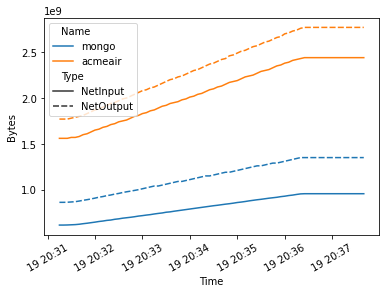

In [5]:
plt.xticks(rotation=30)
p = sns.lineplot(data=resources_bytes_df[(resources_bytes_df["Type"] == "NetInput") | (resources_bytes_df["Type"] == "NetOutput")], x="Time", y="Bytes", hue="Name", style="Type")

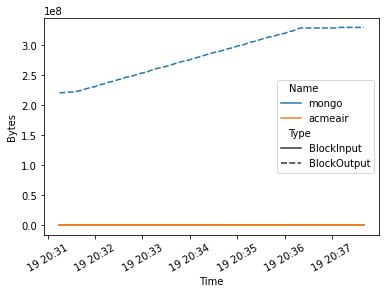

In [6]:
plt.xticks(rotation=30)
p = sns.lineplot(data=resources_bytes_df[(resources_bytes_df["Type"] == "BlockInput") | (resources_bytes_df["Type"] == "BlockOutput")], x="Time", y="Bytes", hue="Name", style="Type")

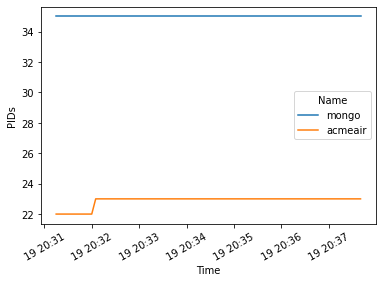

In [7]:
plt.xticks(rotation=30)
p = sns.lineplot(data=resources_df, x="Time", y="PIDs", hue="Name")